### Import cytview, pandas and matplotlib


In [11]:
import cytview as cv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Read your experimental results into a pandas dataframe

In [12]:
"""
Read the dataset into python as a DataFrame object using pandas. An example dataset 
has been included within this project to assist with formatting the input table. In this
case "MetaData_Well" is our single-cell identifier and "Measurement_1" is the feature
we are interested in analysing. It is important that the measurements are numerical.
"""

df = pd.read_csv("dataset/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


### Plot and analyse your measurements of interest

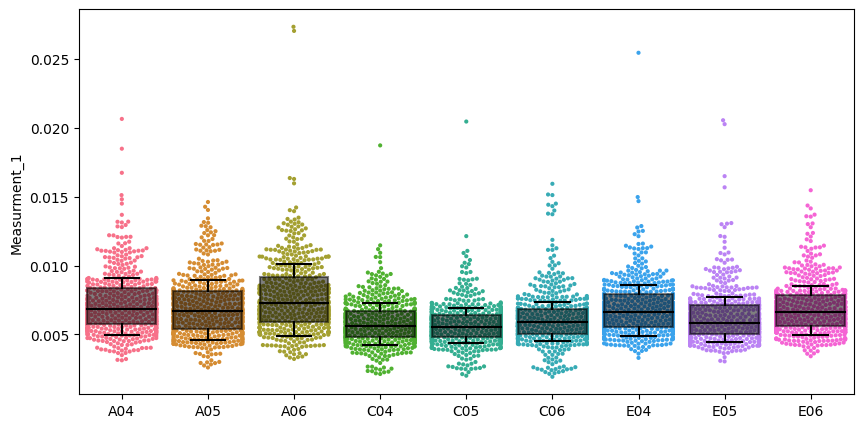

In [13]:
"""
Use cell_plot() to randomly sample a subset of experimental observations and plot the data.
CytView makes use of seaborn's swarmplot() and boxplot() functions and thus any plot-related
parameters can be tweaked using matplotlib. Note: the default number of observations sampled
is 500, this can be changed using the obs_max argument.
"""

plt.figure(figsize=[10,5])

plot = cv.cell_plot(df, measurement= "Measurement_1", identifier= "Metadata_Well")
plt.ylabel("Measurment_1")
plt.show()

In [14]:
"""
cell_plot() returns a dictionary containing both the sampled dataframe and summarised results
"""

# show the sampled dataframe
plot["dataframe"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
2706,0.008838,0.010384,0.007404,0.004849,0.004396,0.006482,0.007899,0.006048,0.005367
378,0.005720,0.009698,0.011479,0.004544,0.005176,0.006326,0.007310,0.005279,0.003839
1417,0.005415,0.006134,0.006540,0.002245,0.004851,0.004698,0.006038,0.003885,0.005120
1042,0.006874,0.006769,0.012977,0.005765,0.005826,0.005030,0.004788,0.005689,0.007385
3632,0.011029,0.005023,0.014215,0.005881,0.004534,0.015116,0.005848,0.004579,0.007131
...,...,...,...,...,...,...,...,...,...
1076,0.008720,0.004802,0.005466,0.006500,0.005139,0.006131,0.004859,0.009793,0.005217
1712,0.008383,0.009009,0.010648,0.007059,0.005354,0.004800,0.004205,0.007126,0.005924
2684,0.006308,0.005444,0.012575,0.007852,0.005303,0.004992,0.007281,0.005085,0.006754
888,0.009397,0.006138,0.006745,0.005328,0.002489,0.008419,0.005188,0.007017,0.007750


In [15]:
# summary of dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.007248,0.006995,0.007729,0.005819,0.005718,0.006160,0.006933,0.006317,0.006938
std,0.002279,0.002176,0.002719,0.001636,0.001589,0.001970,0.002013,0.002020,0.001936
min,0.003113,0.002591,0.003211,0.002118,0.001994,0.001915,0.003289,0.003032,0.003408
25%,0.005721,0.005401,0.005881,0.004799,0.004820,0.005047,0.005555,0.005019,0.005627
50%,0.006838,0.006719,0.007249,0.005578,0.005563,0.005908,0.006652,0.005854,0.006599
75%,0.008367,0.008157,0.009165,0.006694,0.006433,0.006859,0.007906,0.007121,0.007884
max,0.020651,0.014614,0.027346,0.018727,0.020461,0.015937,0.025457,0.020554,0.015469


### Analyse replicate data and perform statistical analysis

Sample 1 vs Sample 2 : p value: 0.00e+00 (****)
Sample 1 vs Sample 3 : p value: 3.38e-11 (****)


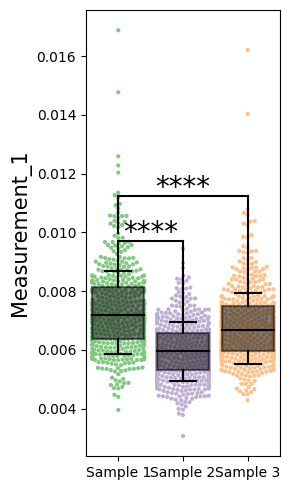

In [17]:
"""
If you have replicate samples you can utilise the group_plot() function to merge, plot
and perform statistics on your dataset. Note: you need to specify at least 2 independent 
replicates in order to use this function.
"""

plt.figure(figsize=[3,5])


"""
Define your groupings as set out below. In this case we're interested in comparing wells
A04, A05, A06 versus C04, C05, C06 versus E04, E05, E06. 
"""
groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

# Provide user-defined labels for each grouping
labels = ["Sample 1", "Sample 2", "Sample 3"]

"""
Plot the data and specify the groupings and labels with the function arguments.
Note: set draw = True in order to draw lines between groups and visualise statistical significance. 
Significance is calculated for every sample against the first using Dunnett’s multiple comparison test.
"""

plot = cv.group_plot(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", 
                     groupings=groupings, labels = labels, draw=True)
plt.tight_layout()
plt.show()

### View the dataframe generated from replicates and output the summary data

In [18]:
"""
View the grouped dataframe. Note: similarly to the cell_plot() function the data has been down-sampled. 
In order to adjust the number of observations sampled (default: 500) change the obs_max parameter.
"""

plot["dataframe"]

,Sample 1,Sample 2,Sample 3
51,0.008912,0.006016,0.010299
1989,0.010177,0.003829,0.005923
3641,0.006622,0.006513,0.006441
3561,0.006665,0.006854,0.006919
3823,0.008172,0.007208,0.007068
...,...,...,...
2002,0.007386,0.006786,0.006936
2080,0.007162,0.005851,0.006292
555,0.008843,0.007898,0.006328
907,0.008053,0.005897,0.016209


In [19]:
# Summary of grouped dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,Sample 1,Sample 2,Sample 3
count,500.000000,500.000000,500.000000
mean,0.007363,0.005985,0.006831
std,0.001470,0.000957,0.001263
min,0.003950,0.003065,0.004283
25%,0.006364,0.005308,0.005971
50%,0.007183,0.005943,0.006674
75%,0.008141,0.006577,0.007480
max,0.016880,0.009443,0.016209


In [20]:
"""
CytView also allows you to directly perform measurement extraction and down-sampling 
if you wish to independently analyse the data outside of python (eg. in R, SPSS, GraphPad, Excel)
"""

values = cv.extract_values(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", obs_max=1000)
values.head()




,A04,A05,A06,C04,C05,C06,E04,E05,E06
2757,0.006926,0.008707,0.011236,0.004987,0.004734,0.007841,0.004886,0.004793,0.004626
742,0.008203,0.008801,0.009286,0.003981,0.005806,0.005512,0.008775,0.005972,0.006182
3890,0.006597,0.006260,0.006470,0.008037,0.006354,0.007767,0.006967,0.007213,0.006834
4708,0.004464,0.006126,0.009898,0.005035,0.005310,0.005594,0.006389,0.007734,0.006672
1897,0.004337,0.006233,0.005464,0.005184,0.005846,0.004971,0.005382,0.004781,0.008068
